# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
display_df = merged_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
display_df
#merged_df -- was not displaying fields in order or as per below
#("Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Matastatic Size", "Drug Regimen", "Sex", "Age_months", "Weight (g)")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [2]:
# Checking the number of mice.
total_mice = merged_df["Mouse ID"].nunique()
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_data = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
unique_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mask = merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
duplicates_df = merged_df[duplicate_mask].sort_values(by=["Mouse ID", "Timepoint"])
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
mouse_metadata["Mouse ID"] = mouse_metadata["Mouse ID"].str.strip()
mouse_metadata = mouse_metadata.dropna()
study_results = study_results.dropna()
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df.sort_values(["Mouse ID", "Timepoint"], inplace=True)
grouped_df = clean_df.groupby(["Mouse ID", "Timepoint"])

# Printing the unique values for each column for each group
for name, group in grouped_df:
    f"Group: {name}"
    for column in group.columns:
        if column not in ["Mouse ID", "Timepoint"]:
            unique_values = group[column].unique()
            f"  {column}: {unique_values}"

clean_df = clean_df[clean_df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df["Mouse ID"].nunique()
num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group the clean_df dataframe by "Drug Regimen"
regimen_group = clean_df.groupby("Drug Regimen")

# Calculation of mean, median, variance, standard deviation, and SEM
mean = regimen_group["Tumor Volume (mm3)"].mean()
median = regimen_group["Tumor Volume (mm3)"].median()
variance = regimen_group["Tumor Volume (mm3)"].var()
std_dev = regimen_group["Tumor Volume (mm3)"].std()
sem = regimen_group["Tumor Volume (mm3)"].sem()

# Summary dataframe with the calculated statistics for each regimen
summary_df = pd.DataFrame({"Mean Tumor Volume": mean,
                           "Median Tumor Volume": median,
                           "Tumor Volume Variance": variance,
                           "Tumor Volume Std. Dev.": std_dev,
                           "Tumor Volume Std. Err.": sem})

summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

# Moving the "Tumor Volume (mm3)" heading row to the top of the columns
summary_df.columns = summary_df.columns.swaplevel(0, 1)
summary_df = summary_df.sort_index(axis=1, level=0, sort_remaining=False)

# Renaming the columns
summary_df.columns = ["Mean", "Median", "Sem", "Std", "Var"]
summary_df


,Mean,Median,Sem,Std,Var
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,4.994774,24.947764
Ceftamin,52.591172,51.776157,0.469821,6.268188,39.290177
Infubinol,52.884795,51.820584,0.492236,6.567243,43.128684
Ketapril,55.235638,53.698743,0.603860,8.279709,68.553577
Naftisol,54.331565,52.509285,0.596466,8.134708,66.173479
Placebo,54.033581,52.288934,0.581331,7.821003,61.168083
Propriva,52.320930,50.446266,0.544332,6.622085,43.852013
Ramicane,40.216745,40.673236,0.320955,4.846308,23.486704
Stelasyn,54.233149,52.431737,0.573111,7.710419,59.450562


## Bar and Pie Charts

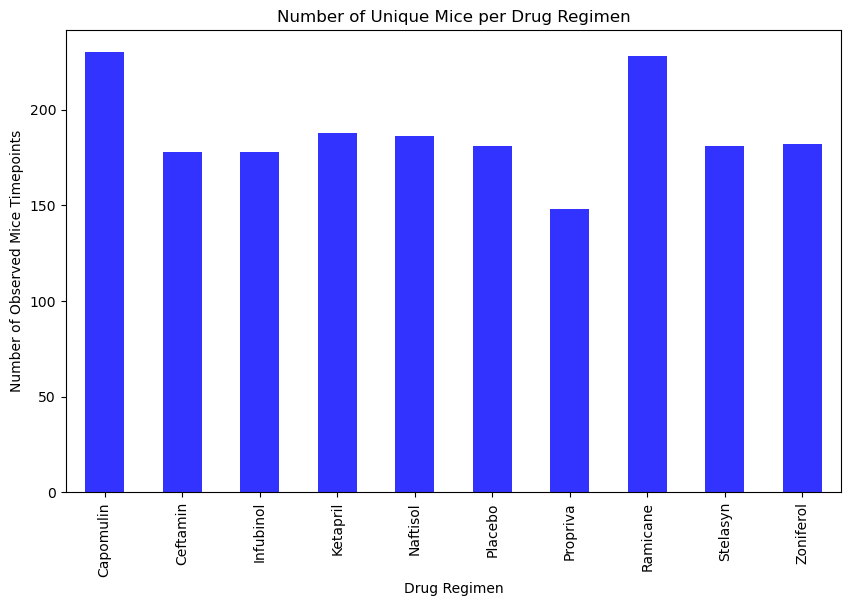

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Grouping clean dataframe by "Drug Regimen" and count the number of unique Mouse ID/Timepoints
regimen_counts = clean_df.groupby("Drug Regimen").size()

# Create a bar plot of the counts using Pandas
regimen_counts.plot(kind="bar", color="b", alpha=0.8, figsize=(10,6))

# Set the title and labels for the plot
plt.title("Number of Unique Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mice Timepoints")

plt.show()

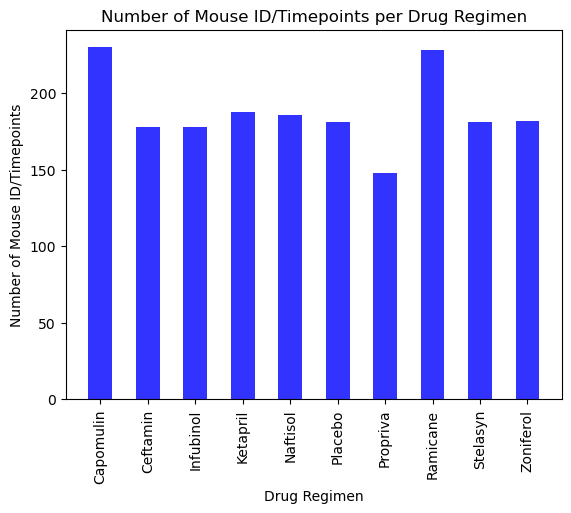

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group the clean_df dataframe by "Drug Regimen" and count the number of Mouse ID/Timepoints for each regimen
regimen_counts = clean_df.groupby("Drug Regimen").size()

# Create a bar plot of the counts for each using pyplot
plt.bar(regimen_counts.index, regimen_counts.values, color="b", alpha=0.8, width=0.5)

# Set the title and labels for the plot
plt.title("Number of Mouse ID/Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")

# Rotating the x-axis labels for readability
plt.xticks(rotation=90)

plt.show()

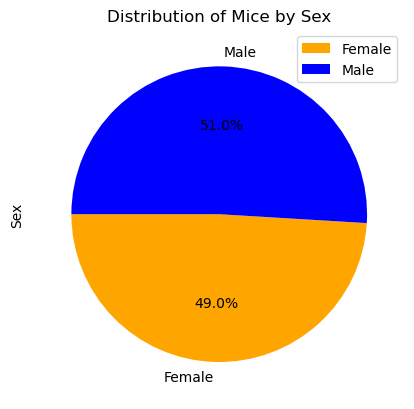

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the clean_df dataframe by "Sex" and count the number of Mouse ID/Timepoints for each sex
sex_counts = clean_df.groupby("Sex").size()

# Creating pie chart of the counts for each sex using Pandas
colors = ['orange', 'blue']
sex_counts.plot(kind="pie", colors=colors, autopct="%1.1f%%", startangle=180)

# Title and legend for the plot
plt.title("Distribution of Mice by Sex")
plt.legend(loc="upper right", labels=sex_counts.index)
plt.ylabel(("Sex"))

plt.show()

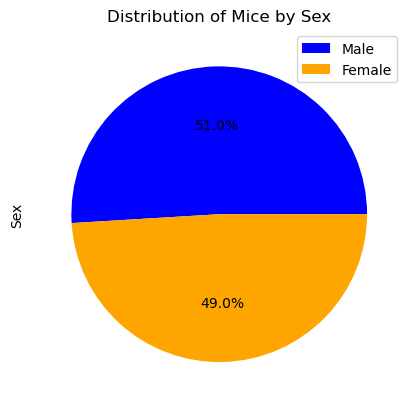

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of Mouse ID/Timepoints for each sex in the clean_df dataframe
sex_counts = clean_df["Sex"].value_counts()

# Create a pie chart of the counts for each sex using pyplot
colors = ['blue', 'orange']
plt.pie(sex_counts, colors=colors, autopct="%1.1f%%", startangle=0)

# Title and legend for the plot
plt.title("Distribution of Mice by Sex")
plt.legend(loc="upper right", labels=sex_counts.index)
plt.ylabel(("Sex"))

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# List of the four treatment regimens
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# last (greatest) timepoint for each mouse
max_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Create a dataframe with Mouse ID and corresponding greatest Timepoint
max_timepoints_df = pd.DataFrame({'Mouse ID': max_timepoints.index, 'Timepoint': max_timepoints.values})

# Merge the max_timepoints_df dataframe with clean_df to get tumor volume
final_tumor_vol_df = pd.merge(max_timepoints_df, clean_df, on=['Mouse ID', 'Timepoint'], how='left')

# Create a new dataframe with only the four treatment regimens of interest
final_tumor_vol_df = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'].isin(regimens)]

final_tumor_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Treatments of interest
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Creating empty list to fill with tumor vol data
tumor_vol_data = []

# Loop through the treatments
for treatment in treatments:
    
    # Locating rows which contain mice on each drug and get the tumor volumes
    subset = final_tumor_vol_df.loc[final_tumor_vol_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append the subset to the tumor_vol_data list
    tumor_vol_data.append(subset)
    
    # Calculation for the IQR
    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Upper and lower bounds for outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Print potential outliers for the subset
    outliers = subset.loc[(subset < lower_bound) | (subset > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


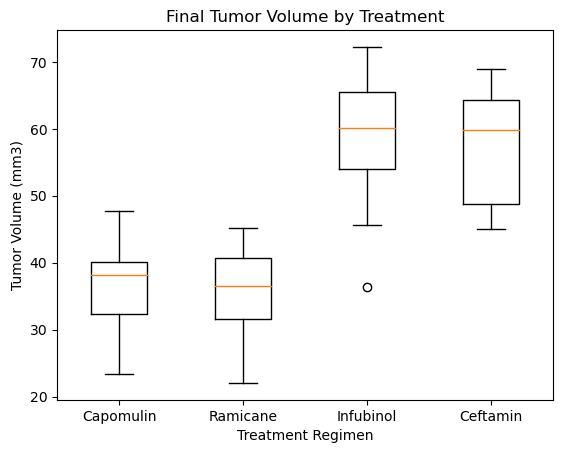

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Creating empty list to hold the tumor volume data for each treatment
tumor_volumes = []

# Loop through each treatment regimen and add the tumor volume data to the list
for treatment in treatments:
    subset = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(subset)

# Boxplot parameters
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume by Treatment')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Treatment Regimen')

# Creating the boxplot and setting up labels
ax.boxplot(tumor_volumes)
ax.set_xticklabels(treatments)

plt.show()

## Line and Scatter Plots

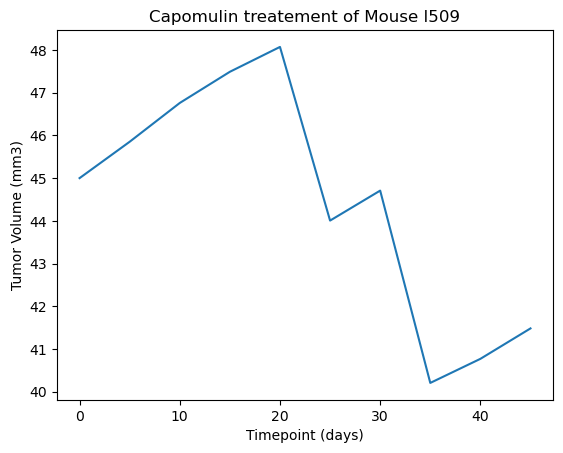

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for the Capomulin treatment and the specific mouse ID
mouse_id = 'l509'
capomulin_data = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == mouse_id]

# Line plot of the tumor volume vs. time point for the mouse
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Setting plot title and labels
plt.title(f"Capomulin treatement of Mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

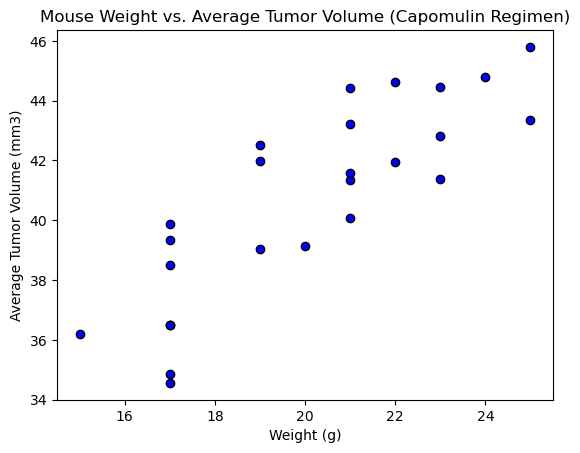

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin regimen
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID with calculation for average tumor volume and weight
grouped_data = capomulin_data.groupby(["Mouse ID"]).agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})

# Create a scatter plot of Weight vs. Tumor Volume
plt.scatter(grouped_data["Weight (g)"], grouped_data["Tumor Volume (mm3)"], marker="o", facecolors="blue", edgecolors="black")

# Title and axis labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume on Capomulin is 0.84


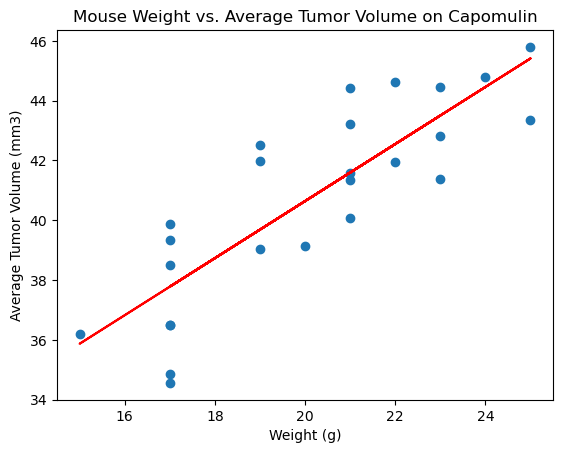

The slope of the linear regression model is 0.95
The y-intercept of the linear regression model is 21.55


In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Create a dataframe with average tumor volume and weight for each mouse on Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
avg_capomulin_df = capomulin_df.groupby("Mouse ID").mean()[["Weight (g)", "Tumor Volume (mm3)"]]

# Calculation of correlation coefficient
correlation = st.pearsonr(avg_capomulin_df["Weight (g)"], avg_capomulin_df["Tumor Volume (mm3)"])[0]
print(f"The correlation coefficient between mouse weight and average tumor volume on Capomulin is {correlation:.2f}")

# Calculation of linear regression model
x = avg_capomulin_df["Weight (g)"]
y = avg_capomulin_df["Tumor Volume (mm3)"]
slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)

# Plot the linear regression model
plt.scatter(x, y)
plt.plot(x, slope*x + intercept, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume on Capomulin")
plt.show()

# Printing the analysis for slope and y-intercept of the linear regression model
print(f"The slope of the linear regression model is {slope:.2f}")
print(f"The y-intercept of the linear regression model is {intercept:.2f}")